# 시계열 데이터

## 1. Numpy의 polyfit으로 회귀(regression) 분석하기

In [2]:
import pandas_datareader.data as web
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [3]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    
plt.rcParams['axes.unicode_minus'] = False

In [4]:
pweb = pd.read_csv('../data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pweb = pweb[pweb['hit'].notnull()]
pweb.head()


,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


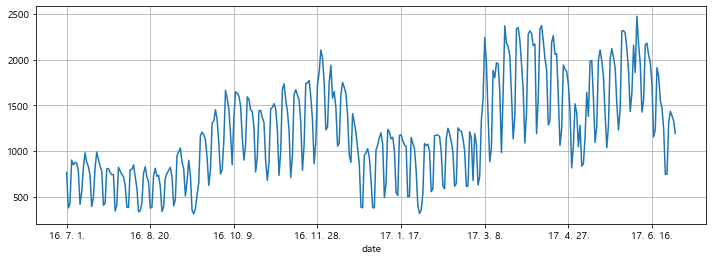

In [5]:
pweb['hit'].plot(figsize=(12,4), grid=True);

In [6]:
time = np.arange(0,len(pweb))
traffic = pweb['hit'].values
fx = np.linspace(0, time[-1], 1000)

In [7]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [8]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.62841018946943
429.5328046676293
330.4777304274343


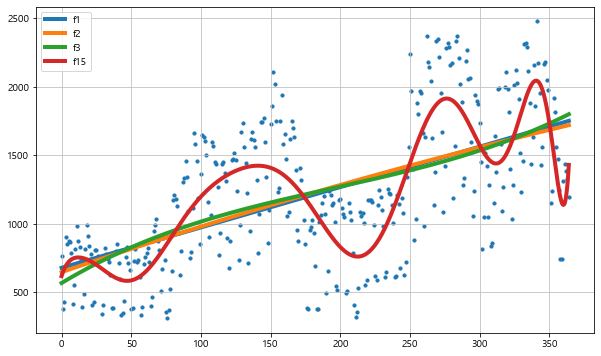

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

## 2. Prophet 모듈을 이용한 forecast 예측

In [10]:
df = pd.DataFrame({'ds':pweb.index, 'y':pweb['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

#Prophet 클래스 객체를 만들고, fit 메서드를 호출
m = Prophet(yearly_seasonality=True, daily_seasonality=True) 
m.fit(df);

In [11]:
#make_future_dataframe : 예측 날짜 구간 생성
future = m.make_future_dataframe(periods=60) 
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#               예측값,  예측 최소값,  예측 최대값

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,688.203220,1110.265141
421,2017-08-26,481.544412,263.226784,687.799238
422,2017-08-27,614.212001,396.964159,826.104264
423,2017-08-28,1166.966207,963.035459,1366.898240
424,2017-08-29,1203.000155,996.073201,1402.562752


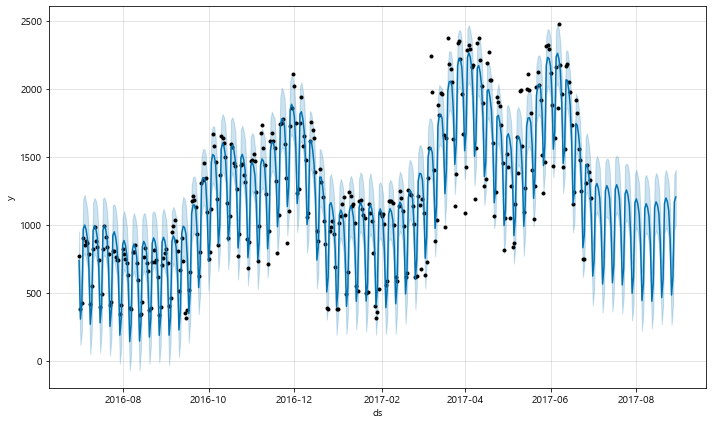

In [13]:
m.plot(forecast);

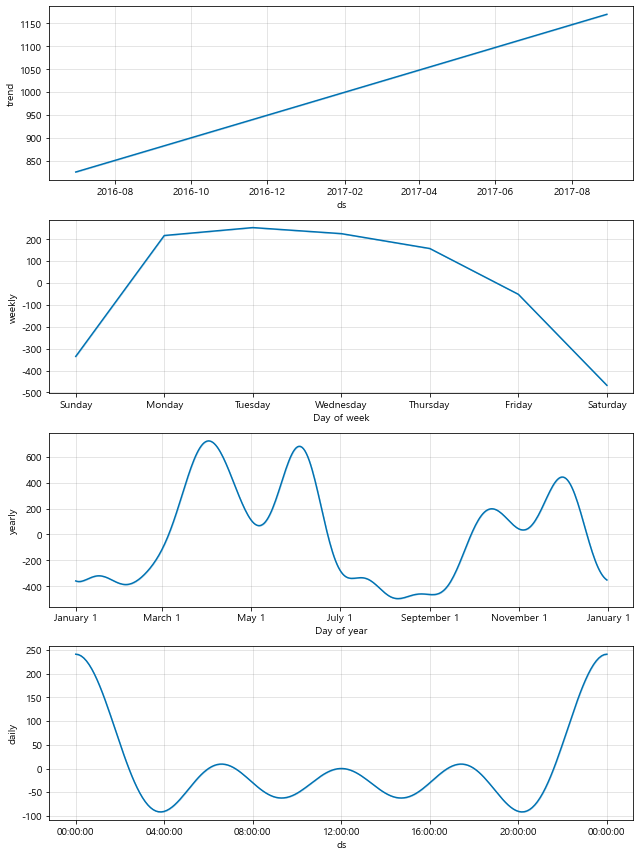

In [14]:
#선형회귀 및 계절성, 성분별로 분리
m.plot_components(forecast);

## 3. Seasonal 시계열 분석으로 주식 데이터 분석하기
#### Python 3.6에서는 DataReader의 web을 통해 구글과 야후 파이낸스 주식자료를 뽑아내는 API가 막힘. 
* 야후는 fix_yahoo_finance (https://pypi.org/project/fix-yahoo-finance/) 참고해서 작성
* 위의 경우 web.DataReader가 아닌, data.get_data_yahoo 라는 메소드를 써야 함.

In [15]:
from pandas_datareader import data

In [16]:
# yahoo https://finance.yahoo.com/
start = datetime(2020, 1, 1)
end = datetime(2020, 4, 30)
df = data.get_data_yahoo("^KS11", start, end)  #KOSPI 지수
df = data.DataReader("^KS11", "yahoo", start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,2044.069946,2028.469971,2034.310059,2043.969971,268100,2043.969971
2017-01-04,2046.290039,2040.609985,2046.290039,2045.640015,371500,2045.640015
2017-01-05,2046.500000,2039.489990,2045.520020,2041.949951,541300,2041.949951
2017-01-06,2051.840088,2045.660034,2048.110107,2049.120117,455400,2049.120117
2017-01-09,2053.179932,2046.469971,2053.179932,2048.780029,398300,2048.780029


In [17]:
start_date = '2009-7-1' 
end_date = '2019-7-31' 
SAM = data.get_data_yahoo('005930.KS', start_date, end_date) #삼성
SAM_trunc=SAM[:'2017-6-30']
SAM.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,12120.0,11800.0,11880.0,12060.0,14641400.0,2.284350
2009-07-02,12200.0,12000.0,12200.0,12040.0,12677100.0,2.280561
2009-07-03,12040.0,11880.0,11900.0,12020.0,11348350.0,2.276772
2009-07-06,12820.0,12180.0,12200.0,12680.0,46675200.0,2.401787
2009-07-07,13120.0,12860.0,12980.0,13000.0,30934250.0,2.462400


In [18]:
start_date='2009-1-1'
end_date='2019-3-26'
KAKAO=data.get_data_yahoo('035720.KS', start_date, end_date)
KAKAO_trunc=KAKAO[:'2017-12-31']
KAKAO.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,32150.0,30000.0,31800.0,30000.0,276419.0,28382.277344
2009-01-05,30900.0,29700.0,30350.0,29900.0,165820.0,28287.669922
2009-01-06,31150.0,29950.0,30100.0,30750.0,204631.0,29091.835938
2009-01-07,32450.0,30800.0,31150.0,32450.0,249212.0,30700.166016
2009-01-08,32250.0,31350.0,31750.0,31850.0,179786.0,30132.517578
2009-01-09,33100.0,31000.0,32400.0,31600.0,290931.0,29895.998047
2009-01-12,31300.0,29600.0,31100.0,29900.0,160131.0,28287.669922
2009-01-13,29900.0,29100.0,29500.0,29900.0,145652.0,28287.669922
2009-01-14,30950.0,29500.0,29750.0,30950.0,122694.0,29281.048828


In [29]:
start = datetime(2009,7,1)
end = datetime(2019,7,31)
df = web.DataReader('000270.KS', 'yahoo',start,end) #기아차
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,12650.0,12250.0,12550.0,12450.0,5925870.0,12450.0
2009-07-02,12900.0,12600.0,12750.0,12700.0,4636681.0,12700.0
2009-07-03,13000.0,12400.0,12400.0,13000.0,3944184.0,13000.0
2009-07-06,13500.0,12800.0,13050.0,13500.0,6033774.0,13500.0
2009-07-07,14000.0,13300.0,13450.0,13900.0,8125407.0,13900.0


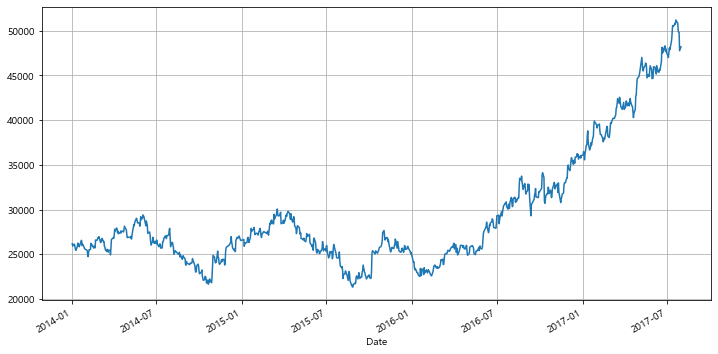

In [30]:
SAM['Close'].plot(figsize=(12,6), grid=True);

In [31]:
#start_date = '2009-7-1' 
#end_date = '2019-7-31' 
SAM_trunc = SAM[:'2016-12-31'] #'2009-7-1'  ~ '2016-12-31'
SAM_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,27100.0,26040.0,26960.0,26180.0,31025000.0,69.459183
2014-01-03,26220.0,25740.0,26000.0,25920.0,26496600.0,68.769363
2014-01-06,26400.0,25920.0,26060.0,26140.0,19735800.0,69.353065
2014-01-07,26360.0,25900.0,26000.0,26080.0,19763200.0,69.193871
2014-01-08,26080.0,25740.0,26000.0,25820.0,20474650.0,68.504051
...,...,...,...,...,...,...
2016-12-23,36080.0,35600.0,36020.0,35640.0,8334850.0,1775.398682
2016-12-26,36000.0,35560.0,35600.0,35960.0,4823600.0,1791.339478
2016-12-27,36200.0,35860.0,35980.0,35980.0,4653450.0,1792.335571


In [32]:
df = pd.DataFrame({'ds':SAM_trunc.index, 'y':SAM_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2014-01-02,26180.0
1,2014-01-03,25920.0
2,2014-01-06,26140.0
3,2014-01-07,26080.0
4,2014-01-08,25820.0


In [33]:
#Prophet 클래스 객체를 만들고 시계열 데이터를 입력으로 fit 메서드를 호출
m = Prophet(daily_seasonality=True)
m.fit(df)

In [34]:
#make_future_dataframe: 예측 날짜 구간 생성
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1100,2017-12-25
1101,2017-12-26
1102,2017-12-27
1103,2017-12-28
1104,2017-12-29


In [35]:
#predict: 신뢰 구간을 포함한 예측 실행
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1100,2017-12-25,51175.689087,31755.252264,70205.530793
1101,2017-12-26,51134.684927,31937.945437,70447.541055
1102,2017-12-27,51066.871882,31998.775966,70620.856825
1103,2017-12-28,51024.558847,31713.490642,71050.940226
1104,2017-12-29,50883.894900,31880.330435,70588.607171


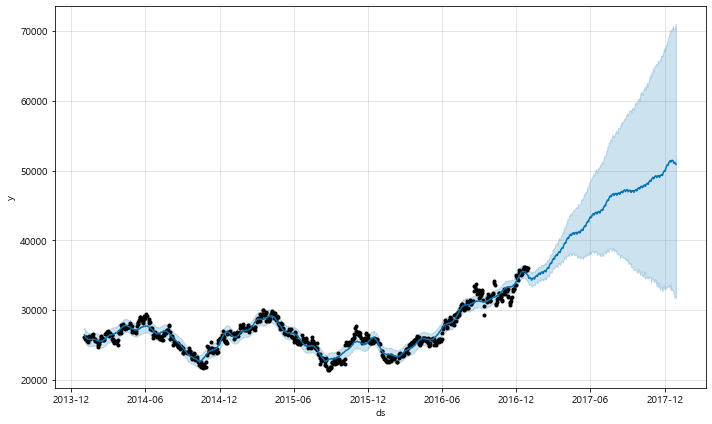

In [36]:
#plot: 원래의 시계열 데이터와 예측 데이터
m.plot(forecast);

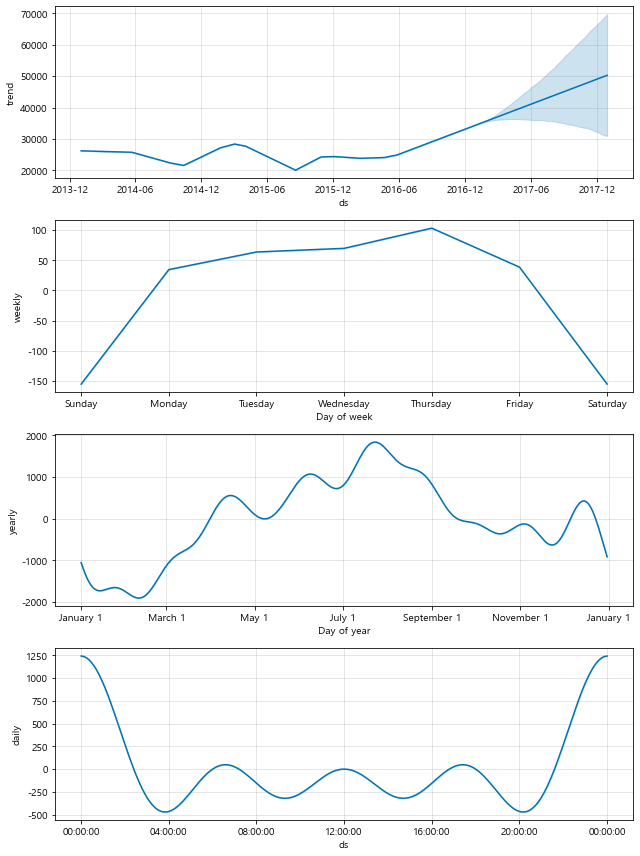

In [37]:
m.plot_components(forecast);

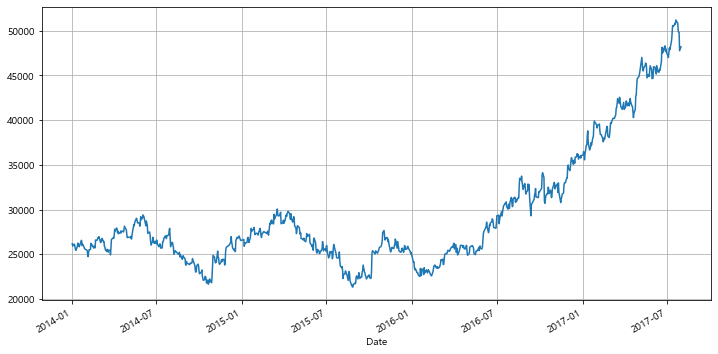

In [38]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
SAM = data.get_data_yahoo('005930.KS', start_date, end_date)
SAM['Close'].plot(figsize=(12,6), grid=True);

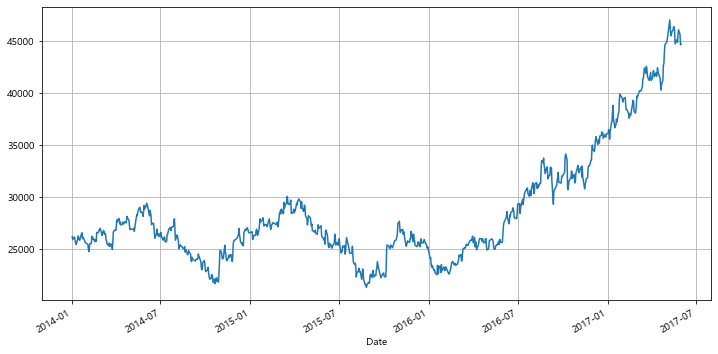

In [39]:
#일부 데이터를 잘라서 forecast를 수행 ==>  '2014-1-1'  ~ '2017-7-31'
SAM_trunc = SAM[:'2017-05-31']
SAM_trunc['Close'].plot(figsize=(12,6), grid=True);

In [40]:
df = pd.DataFrame({'ds':SAM_trunc.index, 'y':SAM_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [41]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [42]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


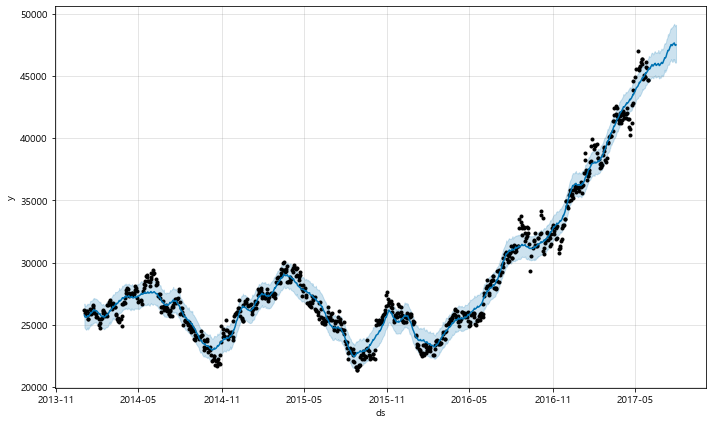

In [43]:
forecast = m.predict(future)
m.plot(forecast);

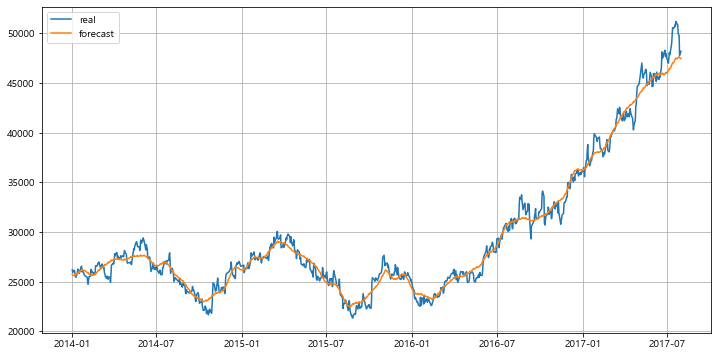

In [44]:
plt.figure(figsize=(12,6))
plt.plot(SAM.index, SAM['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## 4 Growth Model

In [45]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])
df

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [46]:
df['cap'] = 8.5
df['floor'] =6

In [47]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

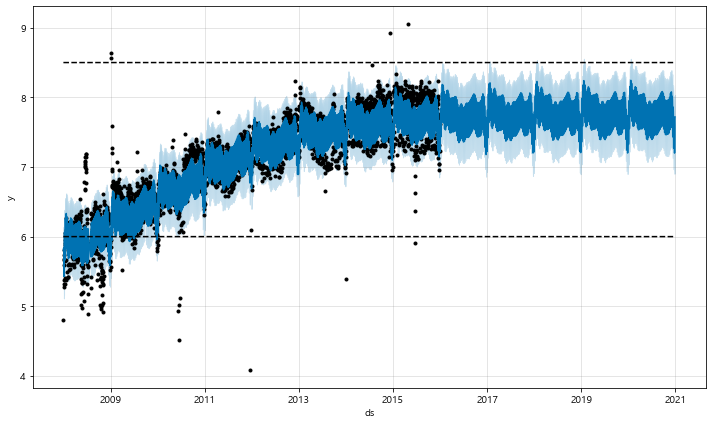

In [48]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5  #상한값
future['floor'] = 6
fcst = m.predict(future)
m.plot(fcst);

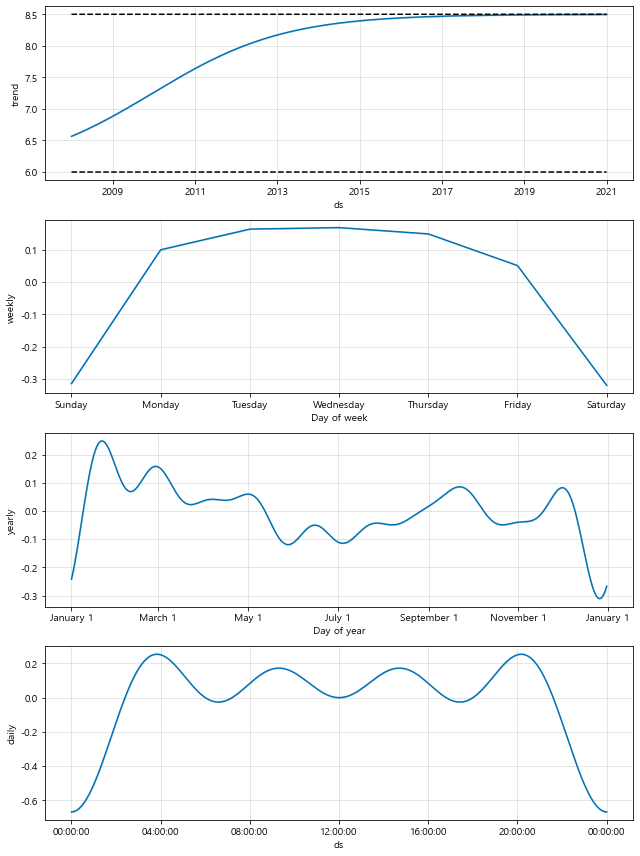

In [49]:
forecast = m.predict(future)
m.plot_components(forecast);

## holiday

In [50]:
df = pd.read_csv('../data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

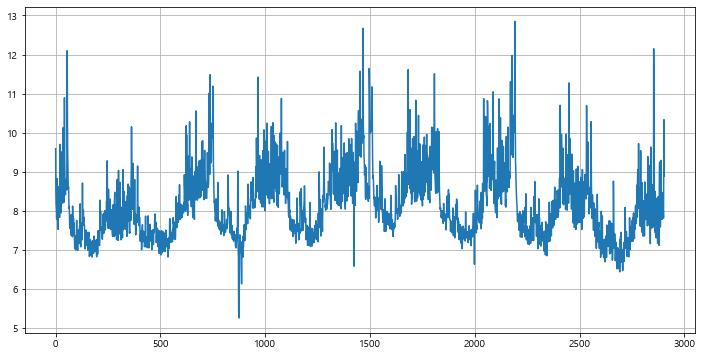

In [51]:
df.y.plot(figsize=(12,6), grid=True);

In [52]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [53]:
#m = Prophet(holidays=holidays, daily_seasonality=True)
m = Prophet( daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [54]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

KeyError: 'playoff'

In [ ]:
m.plot(forecast);

In [ ]:
m.plot_components(forecast);